In [1]:
import sys
sys.path.append('../')

In [2]:
from utils import load_annotation

In [4]:
annotation_file = "../data/person_detection_and_tracking_results_drop-Gaitparams_PD.pkl"
frame_root = "/data/GaitData/RawFrames"

anno = load_annotation(annotation_file, frame_root)
anno.head()

Total:  672138


,path,pos
0,/data/GaitData/RawFrames/7119824_test_0_trial_...,"171.8476104736328,0.74737548828125,418.3994598..."
1,/data/GaitData/RawFrames/7119824_test_0_trial_...,"162.7849578857422,4.991180419921875,418.596694..."
2,/data/GaitData/RawFrames/7119824_test_0_trial_...,"155.2943572998047,3.7421722412109375,425.62208..."
3,/data/GaitData/RawFrames/7119824_test_0_trial_...,"153.48960876464844,8.34130859375,423.816116333..."
4,/data/GaitData/RawFrames/7119824_test_0_trial_...,"150.11587524414062,3.5623321533203125,425.6660..."


In [65]:
# group by video name
fn = lambda row: os.path.dirname(row)
video_names = anno.path.apply(fn).unique()
print("number of videos: {}".format(len(video_names)))

number of videos: 3693


In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# bbox positions
bbox_data = anno.pos.apply(lambda x: eval(x)).values.tolist()
bbox_data = np.array(bbox_data)

In [27]:
bbox_data.shape

(672138, 4)

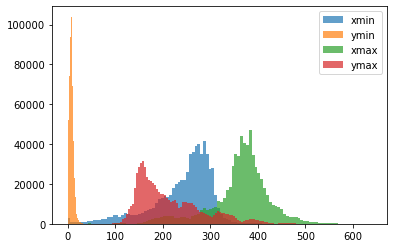

In [38]:
columns = ['xmin', 'ymin', 'xmax', 'ymax']
for i,name in enumerate(columns):
    plt.hist(bbox_data[:, i], label=name, bins=100, alpha=0.7)
plt.legend()

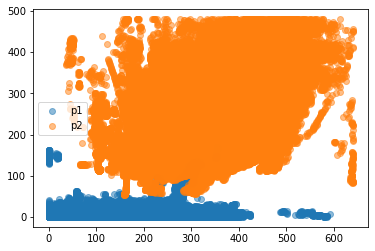

In [44]:
plt.scatter(bbox_data[:, 0], bbox_data[:, 1], label='p1', alpha=0.5)
plt.scatter(bbox_data[:, 2], bbox_data[:, 3], label='p2', alpha=0.5)
plt.legend()